<div align="center">

# Prédiction de la souscription d'un dépôt à terme  

## Analyse exploratoire des données (EDA)

<img src="https://raw.githubusercontent.com/komiadok/termdepositforecast/main/cover_image.jpg" width="500"/>

</div>

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
📚 Chargement des librairies
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
🗃️ Partie 1 : Importation des données
</div>

In [2]:
# Chargement du dataset
data = pd.read_csv('../data/raw/bank-additional-full.csv', sep = ';')
print(f'Taille du dataframe : {data.shape}')

# Aperçu du dataset
data.head()

Taille du dataframe : (41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
⚙️ Partie 2 : Data Preprocessing
</div>

In [3]:
# Définition du chemin où se trouve utils
import sys
sys.path.append('../pipelines/')  

# Importation de la classe
from preprocess import DataCleaningPipeline

In [4]:
# Instancier le pipeline
pipeline = DataCleaningPipeline(
    min_age=18,
    max_duration=300,
    max_calls=5,
    output_dir='../data/outputs'
)

# Transformation du DataFrame
cleaned_data = pipeline.fit_transform(data)
print(f'Taille du dataframe : {cleaned_data.shape}')

# Vérifier les premières lignes
cleaned_data.head()

Taille du dataframe : (41183, 31)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,missing_job,missing_marital,missing_education,missing_default,missing_housing,missing_loan,outlier_duration,outlier_campaign,outlier_previous,never_contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,False,True
1,57,services,married,high.school,missing,no,no,telephone,may,mon,...,False,False,False,True,False,False,False,False,False,True
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,False,True
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,False,True
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,False,False,False,False,False,False,True,False,False,True


<div style="background-color:#008080; color:white; padding:15px; border-radius:8px; font-weight:bold; font-size:16px;">
🎯 Partie 3 : Impact des variables sur la souscription
</div>

### 👤 Variables socio-démographiques

#### age

Dans le cadre de l’analyse exploratoire, la variable `age` a été subdivisée en segments afin de mieux refléter les profils et besoins des clients.<br> Cette segmentation repose sur un découpage en classes homogènes, fréquemment utilisées dans le secteur bancaire et marketing :
* **18-24 ans** : Jeunes adultes, phase d’entrée dans la vie active, besoins de bancarisation initiale (compte courant, carte, prêt étudiant).
* **25-29 ans** : Jeunes actifs, début de carrière, premiers projets d'épargne ou de crédit.
* **30-39 ans** : Adultes établis, installation familiale, crédits immobiliers, assurance vie.
* **40-49 ans** : Maturité professionnelle, revenus consolidés, diversification patrimoniale.
* **50-59 ans** : Préparation de la retraite, désendettement progressif, transmission.
* **60 ans et plus** : Seniors, gestion de patrimoine, retraite, assurance santé/dépendance.

L'objectif de ce découpage est de : 
1. Améliorer l’interprétation des analyses en regroupant des comportements financiers similaires.
2. Aligner l’analyse sur les pratiques marketing utilisées dans le secteur bancaire (cycle de vie client).
3. Faciliter la personnalisation des offres et campagnes en fonction de la tranche d’âge.

**Source**

[Segmentation du marché](https://en.wikipedia.org/wiki/Market_segmentation)

In [5]:
# Copie du DataFrame
eda_data = cleaned_data.copy()

# Définition des bornes et labels
bins = [17.9, 24, 29, 39, 49, 59, np.inf]
labels = ["18-24", "25-29", "30-39", "40-49", "50-59", "60+"]

# Création de la colonne 'age_group'
eda_data['age_group'] = pd.cut(eda_data['age'], bins=bins, labels=labels, right=True)

eda_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,missing_marital,missing_education,missing_default,missing_housing,missing_loan,outlier_duration,outlier_campaign,outlier_previous,never_contacted,age_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,True,50-59
1,57,services,married,high.school,missing,no,no,telephone,may,mon,...,False,False,True,False,False,False,False,False,True,50-59
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,True,30-39
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,False,False,True,40-49
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,False,False,False,False,False,True,False,False,True,50-59


In [6]:
# Mapping des valeurs
eda_data['y'] = eda_data['y'].map({'no': 0, 'yes': 1})

# Conversion en 'int'
eda_data['y'] = eda_data['y'].astype(int)

In [7]:
# Définition du chemin où se trouve utils
import sys
sys.path.append('../')  

# Importation des fonctions à utiliser
from utils import plot_subscription_rate, plot_scatterplot

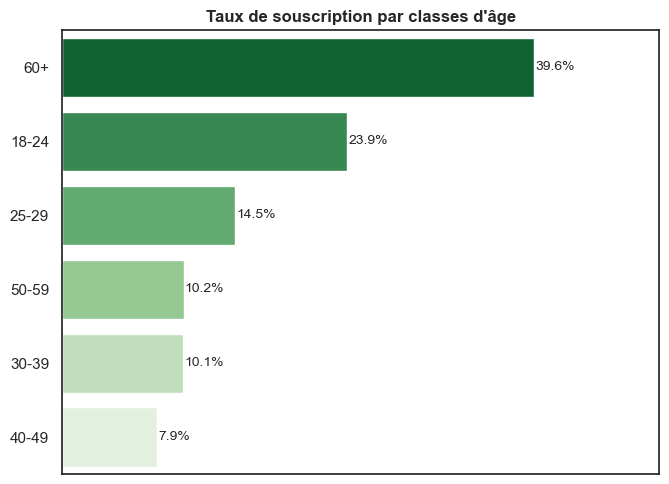

In [8]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'age_group', "Taux de souscription par classes d'âge")

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.5)           # limites de l'axe X de 0 à 0.5 (0% à 50%)

# Affichage du graphique
plt.show()

**Obervation**

L’analyse exploratoire du taux de souscription montre des disparités importantes selon les tranches d’âge :
* La tranche des **60 ans et plus** présente le taux de souscription le plus élevé (**39.6%**), ce qui indique que ce segment est particulièrement réceptif aux offres de dépôt à terme.
* Les jeunes adultes (**18-24 ans**) suivent avec un taux de souscription de **23,9%**, tandis que les tranches **25-29 ans** atteignent **14,5%**.
* Les taux pour les tranches intermédiaires (**30-39 ans : 10,1% et 40-49 ans : 7,9%**) sont nettement plus faibles, suggérant une moindre appétence pour le produit à ce stade de la vie active.
* La tranche **50-59 ans** se situe à **10,2%**, restant modeste par rapport aux 60+.

**Interprétation**

* Le taux croissant chez les seniors peut refléter une capacité d'épargne plus élevée et une volonté de sécuriser leurs placements.
* Les jeunes adultes montrent une sensibilité notable aux offres, ce qui peut être exploité par des campagnes marketing ciblées avec des messages adaptés. Bien que leur capacité d’épargne soit plus limitée, ils sont souvent ouverts à découvrir les produits bancaires et à souscrire des placements simples pour débuter leur expérience financière.
* Les tranches intermédiaires, moins réceptives, probablement parce qu’elles conjuguent dépenses courantes, crédits et obligations familiales, ce qui réduit leur capacité ou leur motivation à souscrire à ce type de produit.

**Recommandation**

* Prioriser les campagnes de communication et d’acquisition vers les segments 60+ et 18-24 ans pour maximiser le rendement des actions marketing.
* Développer des offres spécifiques ou des incentives pour les tranches intermédiaires afin d’augmenter leur taux de souscription.

#### job

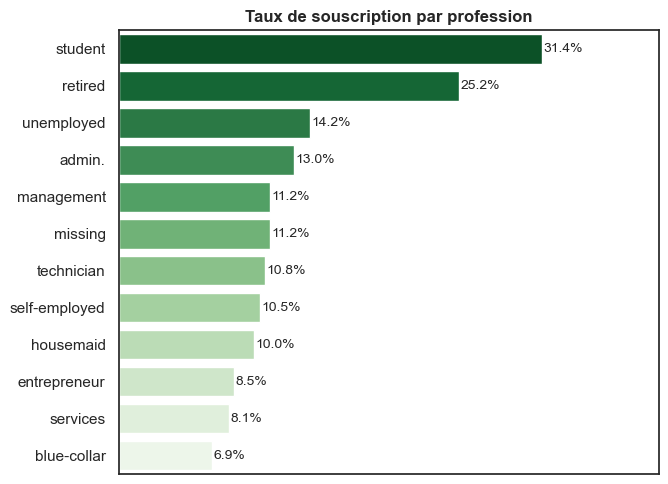

In [9]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'job', "Taux de souscription par profession")

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.4)           # limites de l'axe X de 0 à 0.5 (0% à 40%)

# Affichage du graphique
plt.show()

**Observation**

L’analyse du taux de souscription montre des différences significatives selon les segments professionnels :
* Les **étudiants** présentent le taux de souscription le plus élevé (**31,4%**), suivis des **retraités** (**25,2%**). Cela suggère que ces deux groupes sont particulièrement réceptifs aux offres de dépôt à terme, malgré des motivations financières différentes (épargne sécurisée pour les retraités, premières démarches financières pour les étudiants).
* Les **chômeurs** affichent un taux de **14,2%**, indiquant une sensibilité modérée aux offres.
* Les professions intermédiaires comme **administratif** (**13%**), **management** (**11,2%**) et **technicien** (**10,8%**) montrent des taux plus modestes.
* Les **entrepreneurs** (**8,5%**), **métiers de services** (**8,1%**) et **ouvriers** (**6,9%**) ont les taux les plus faibles, ce qui peut refléter soit un moindre intérêt pour ce type de produit, soit une moindre capacité d’épargne disponible.
* La catégorie **missing** (**11,2%**) suggère que les données manquantes doivent être traitées avec prudence dans les analyses futures.

**Interprétation**

* Les taux élevés chez les étudiants et les retraités indiquent deux segments prioritaires pour les campagnes marketing. Les étudiants cherchent à mettre de l’argent de côté en toute sécurité, tandis que les retraités ont souvent une épargne accumulée et une préférence pour les produits stables.
* Les professions intermédiaires et salariées (administratif, management, technicien) ont des taux modérés (10-13%), reflétant un intérêt limité pour les produits à faible rendement, car elles peuvent privilégier d’autres types de placements ou investissements.
* Les entrepreneurs, ouvriers et professions de services présentent les taux les plus faibles (<9%), possiblement en raison d’une priorité sur la liquidité et le financement de projets professionnels ou familiaux plutôt que sur les dépôts à terme.

**Recommandation**

* Concentrer les efforts marketing sur les **étudiants et retraités**.
* Explorer des campagnes personnalisées pour les segments intermédiaires et les professions à taux faible.
* Traiter les données manquantes pour affiner les analyses futures.

#### marital

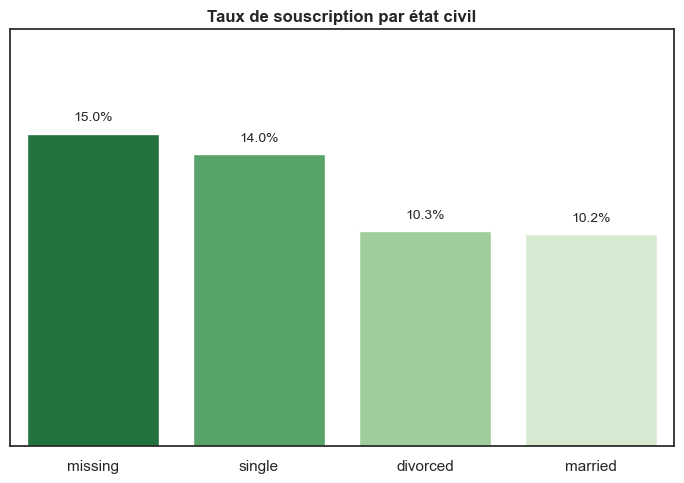

In [10]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'marital', "Taux de souscription par état civil", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.2)           # limites de l'axe Y de 0 à 0.5 (0% à 20%)

# Affichage du graphique
plt.show()

**Observation**

* La catégorie **missing** (données manquantes) présente le taux le plus élevé (**15%**), ce qui suggère que certaines informations non renseignées pourraient être associées à une souscription plus fréquente ou à des profils particuliers.
* Les **célibataires** suivent avec un taux de **14%**, indiquant une réceptivité relativement élevée aux offres de dépôt à terme.
* Les **divorcés** (**10,3%**) et les **mariés** (**10,2%**) montrent des taux plus modestes, reflétant un intérêt moindre pour le produit dans ces segments.

**Interprétation**

* Les célibataires et les profils pour lesquels l’état civil est manquant sont les segments les plus réceptifs. Les célibataires peuvent disposer de revenus plus flexibles et moins d’engagements financiers familiaux, ce qui favorise la souscription.
* Les autres catégories (divorcés et mariés) présentent des taux plus faibles, sûrement liés à des charges familiales plus importantes et une allocation de budget prioritairement dirigée vers le logement, les études des enfants ou le remboursement de crédits.

**Recommandation**

* Prioriser les actions marketing sur les célibataires et analyser plus en détail la catégorie missing pour mieux comprendre ce segment.
* Envisager des offres personnalisées ou incitations spécifiques pour les segments à taux plus faible.

#### education

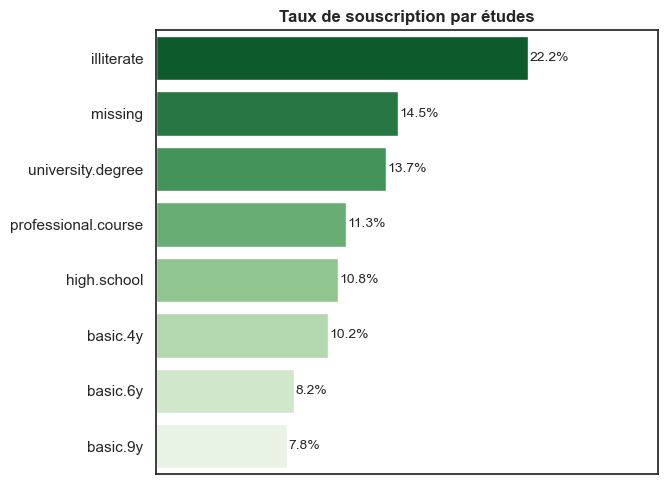

In [11]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'education', "Taux de souscription par études")

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.3)           # limites de l'axe X de 0 à 0.5 (0% à 30%)

# Affichage du graphique
plt.show()

**Observation**

Les résultats montrent des tendances intéressantes en fonction du niveau de formation :
* Les **personnes analphabètes** (**22,2%**) présentent le taux de souscription le plus élevé. Cela peut refléter une préférence pour des produits simples et sécurisés, ou un segment spécifique de la population avec une épargne disponible limitée mais orientée vers des placements garantis.
* La catégorie **missing** (**14,5%**) suit, indiquant que les informations manquantes doivent être traitées avec prudence et pourraient représenter un segment sensible aux campagnes marketing.
* Les **individus titulaires d’un diplôme universitaire** (**13,7%**) et **ceux ayant suivi un cours professionnel** (**11,3%**) montrent des taux intermédiaires. Cela pourrait s’expliquer par une diversification de leurs investissements : ils peuvent être attirés par des produits plus complexes ou à rendement plus élevé que les dépôts à terme classiques.
* Les **diplômés du lycée** (**10,8%**) et des **niveaux de base** (basic.4y : 10,2%, basic.6y : 8,2%, basic.9y : 7,8%) ont des taux plus faibles, suggérant soit une capacité d’épargne plus limitée, soit une préférence pour d’autres produits financiers.

**Interprétation**

* Les taux les plus élevés chez les segments illiterate et missing indiquent que la simplicité et la sécurité du produit sont des facteurs déterminants.
* Les niveaux d’études plus élevés ne garantissent pas forcément un taux plus élevé : ces clients peuvent diversifier leur épargne dans d’autres produits plus complexes ou à rendement plus attractif.
* Les campagnes marketing devraient être adaptées au niveau de formation : pédagogie pour les segments peu instruits, mise en avant du rendement et des garanties pour les niveaux d’études plus élevés.

**Recommandation**

1. Cibler prioritairement les personnes analphabètes et la catégorie missing avec des messages simples et clairs sur la sécurité et la simplicité du produit.
2. Adapter la communication pour les diplômés et les profils plus instruits, en mettant en avant :
    * la sécurité et la garantie du capital
    * la simplicité d'accès et la flexibilité du produit
3. Segmenter les campagnes en fonction du niveau d’études pour maximiser la pertinence et l’efficacité des actions marketing.

### 💳 Variables financières

#### default

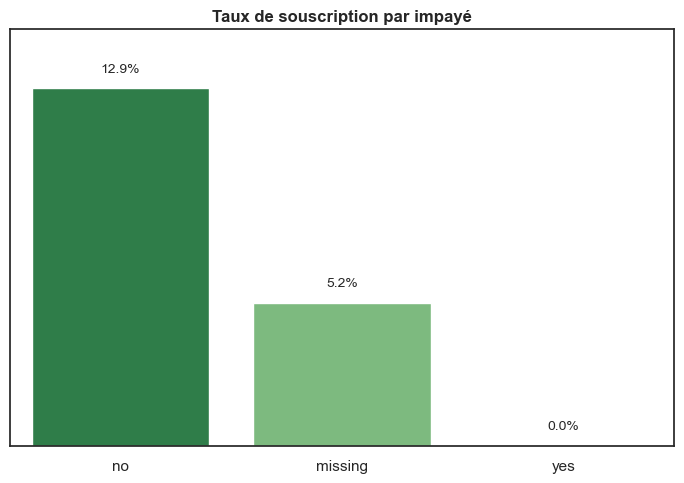

In [12]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'default', "Taux de souscription par impayé", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.15)           # limites de l'axe Y de 0 à 0.5 (0% à 15%)

# Affichage du graphique
plt.show()

**Observation**

Les résultats montrent une relation claire entre l’historique de défaut de paiement et le taux de souscription :
* Les **clients n’ayant jamais eu de défaut** affichent un taux de souscription de **12,9%**, le plus élevé parmi les catégories. Cela reflète une confiance et une stabilité financière, rendant ces clients plus enclins à souscrire à un dépôt à terme.
* Les **clients avec données manquantes** ont un taux de **5,2%**, ce qui suggère que l’absence d’information sur leur historique peut limiter la capacité à souscrire, ou reflète un profil plus prudent.
* Les **clients ayant déjà eu un défaut** présentent un taux de souscription de **0,0%**, indiquant que ces clients sont très peu enclins à souscrire, probablement en raison de restrictions bancaires, d’un accès limité aux produits ou d’une prudence accrue des établissements financiers.

**Interprétation**

* La variable `default` est un facteur clé pour la souscription : un historique financier sain favorise l’accès et la confiance envers les produits bancaires.
* Les clients avec impayés passés constituent un segment à risque, peu rentable pour ce type de produit, et devraient être ciblés avec d’autres produits plus adaptés ou faire l’objet d’une gestion spécifique du risque.
* Les missing peuvent représenter un segment potentiel à investiguer, mais les informations manquantes doivent être complétées pour mieux comprendre leur comportement.

**Recommandation**

1. Cibler en priorité les clients sans défaut pour maximiser le taux de souscription.
2. Ne pas proposer systématiquement le dépôt à terme aux clients ayant eu un défaut, sauf si des conditions spécifiques sont mises en place.
3. Analyser la catégorie missing pour déterminer si ces clients peuvent être segmentés ou si des mesures de collecte de données supplémentaires sont nécessaires.

#### housing

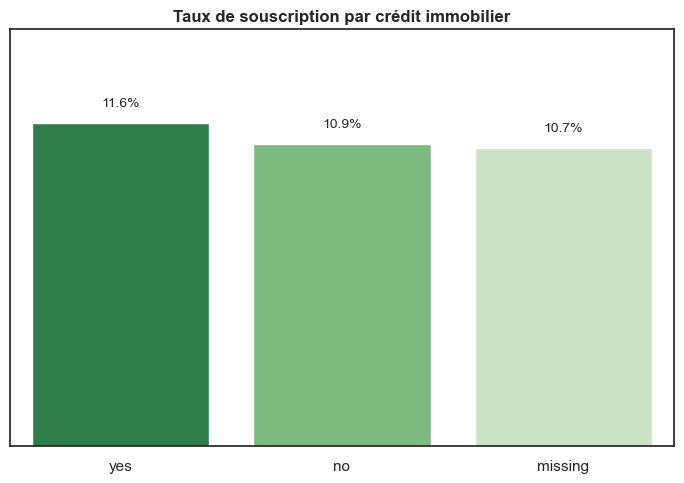

In [13]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'housing', "Taux de souscription par crédit immobilier", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.15)           # limites de l'axe Y de 0 à 0.5 (0% à 15%)

# Affichage du graphique
plt.show()

**Observation**

Les résultats montrent que la détention d’un crédit immobilier n’a qu’un impact modéré sur le taux de souscription au dépôt à terme :
* Les **clients ayant un crédit immobilier** présentent un taux de souscription de **11,6%**, légèrement supérieur aux autres segments. Cela peut s’expliquer par une stabilité financière relative et la capacité à gérer à la fois un crédit et une épargne supplémentaire.
* Les **clients sans crédit immobilier** ont un taux de **10,9%**, très proche du segment précédent, indiquant que l’absence de crédit n’est pas un frein à la souscription.
* La catégorie **missing** (**10,7%**) montre un taux similaire, suggérant que les informations manquantes n’affectent pas fortement la propension à souscrire pour ce produit.

**Interprétation**

* Le crédit immobilier n’est pas un facteur déterminant pour la souscription au dépôt à terme : les clients avec ou sans crédit montrent des comportements très similaires.
* La légère supériorité du taux chez les détenteurs de crédit immobilier pourrait refléter une discipline financière accrue ou une relation bancaire plus consolidée.
* La catégorie missing reste à surveiller, mais elle ne semble pas introduire de biais majeur.

**Recommandation**

1. Pas de ciblage prioritaire basé uniquement sur le crédit immobilier, car la différence de taux est faible.
2. Intégrer cette variable dans des analyses combinées (âge, profession, état civil, études) pour identifier des segments plus précis et réceptifs.
3. Les clients ayant un crédit immobilier peuvent être réceptifs à des offres combinant épargne et financement, mais cela nécessite des messages adaptés.

#### loan

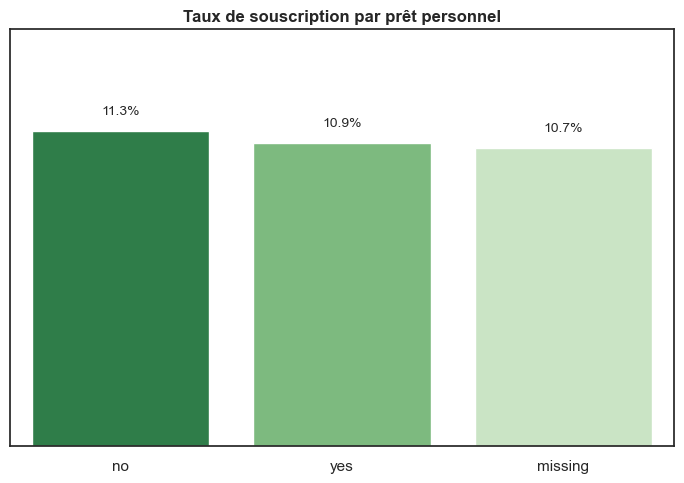

In [14]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'loan', "Taux de souscription par prêt personnel", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.15)           # limites de l'axe Y de 0 à 0.5 (0% à 15%)

# Affichage du graphique
plt.show()

**Observation**

Les résultats indiquent que la détention d’un crédit immobilier n’influence que légèrement le taux de souscription au dépôt à terme :
* Les **clients sans crédit immobilier** présentent un taux de souscription de **11,3%**, légèrement supérieur aux détenteurs de crédit.
* Les **clients ayant un crédit immobilier** ont un taux de **10,9%**, indiquant une différence marginale par rapport aux autres segments.
* La catégorie **missing** (**10,7%**) est très proche des deux précédentes, suggérant que l’absence d’information ne modifie pas significativement le comportement de souscription.

**Interprétation**

* La possession d’un crédit immobilier n’est pas un facteur déterminant pour la souscription à ce type de produit.
* La légère différence entre les segments peut refléter une prudence des détenteurs de crédit ou une allocation de budget prioritairement orientée vers le remboursement du prêt.
* Les clients sans crédit peuvent disposer de plus de flexibilité financière pour souscrire à un produit d’épargne comme le dépôt à terme.

**Recommandation**

1. Ne pas segmenter les campagnes uniquement sur la base du crédit immobilier, car la différence de taux est faible.
2. Combiner cette variable avec d’autres facteurs (âge, profession, état civil, études, default) pour identifier des segments plus réceptifs et affinés.
3. Adapter éventuellement la communication pour les détenteurs de crédit immobilier, en mettant en avant la facilité de souscription et la sécurité du placement, sans les sur-solliciter.

### ☎️ Variables liées à la campagne de prospection

#### contact

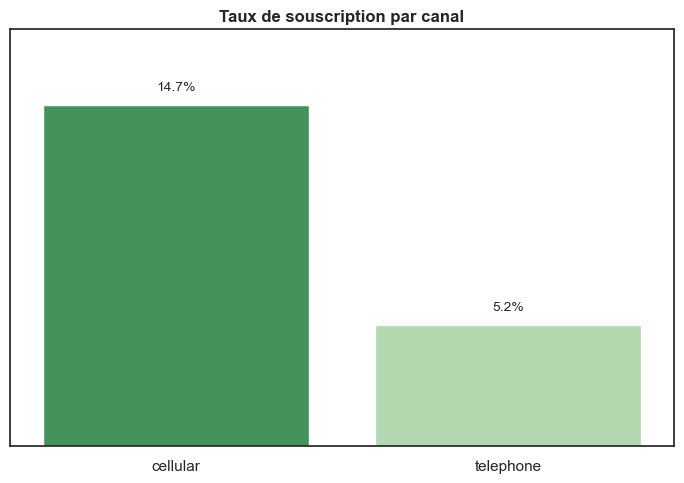

In [15]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'contact', "Taux de souscription par canal", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.18)           # limites de l'axe Y de 0 à 0.5 (0% à 18%)

# Affichage du graphique
plt.show()

**Observation**

La différence est nette : les clients contactés par **téléphone mobile** affichent un taux de souscription près de **3 fois supérieur** à ceux contactés via une ligne fixe.

**Interprétation**

* **Accessibilité et réactivité** : les clients joignables sur mobile sont généralement plus accessibles, disponibles et réactifs. Cela favorise un meilleur taux de conversion.
* **Profil démographique** : les utilisateurs de téléphones mobiles peuvent être plus jeunes, actifs professionnellement et connectés, donc plus enclins à envisager un placement bancaire.
* **Obsolescence du téléphone fixe** : le recours à une ligne fixe est de plus en plus rare, souvent associé à une population plus âgée et/ou moins réceptive aux offres de prospection.

**Recommandation**

1. Prioriser le canal mobile pour les futures campagnes, car il maximise le retour sur investissement.
2. Limiter les efforts sur les lignes fixes qui montrent une efficacité faible (sauf si ciblage particulier de seniors avec une approche adaptée).
3. Renforcer la personnalisation par mobile (ex. SMS de rappel, campagnes WhatsApp, appels ciblés) afin de capitaliser sur le potentiel plus élevé de ce canal.
4. Compléter cette stratégie par une segmentation fine (âge, profession, état civil) pour combiner le bon canal avec le bon profil client.

#### month

In [16]:
# Transformer la colonne 'month' en catégorie ordonnée
months = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
eda_data['month'] = pd.Categorical(eda_data['month'], categories=months, ordered=True)

# Enlever les catégories non utilisées
eda_data['month'] = eda_data['month'].cat.remove_unused_categories()

# Regroupement 
month_data = (
    eda_data.groupby('month', observed=True)['y']
            .mean()
            .reset_index(name='subscription_rate')
)

# Aperçu
month_data

,month,subscription_rate
0,mar,0.505495
1,apr,0.204787
2,may,0.064347
3,jun,0.105115
4,jul,0.090466
5,aug,0.105928
6,sep,0.449123
7,oct,0.437936
8,nov,0.101439
9,dec,0.489011


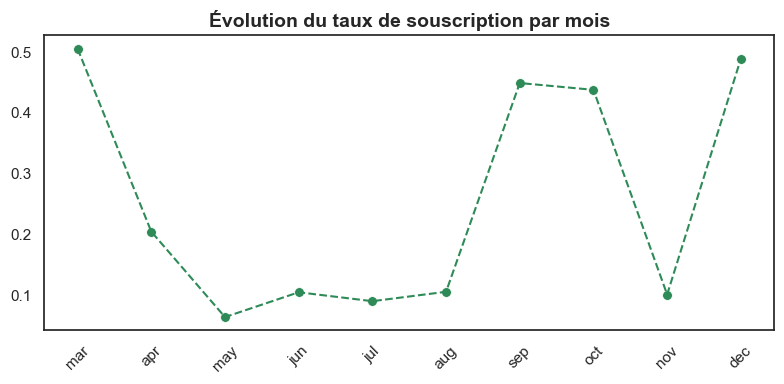

In [17]:
# Création du scatterplot
fig, ax = plt.subplots(figsize=(8, 4))
plot_scatterplot(ax, month_data, 'month', 'subscription_rate', "Évolution du taux de souscription par mois")
plt.tight_layout()
plt.show()

**Observation**

* Les mois de **mars, septembre, octobre et décembre** affichent des taux exceptionnellement élevés (≈44–51%).
* Les mois de **mai à août et novembre** sont beaucoup plus faibles, parfois proches de 6–10%.

**Interprétation**

* Mars peut correspondre à la fin du premier trimestre, période où les clients reçoivent parfois des bonus, primes ou bilans financiers annuels (donc davantage enclins à placer leur argent).
* Septembre et octobre sont traditionnellement des mois de reprise après l'été : retour à la stabilité professionnelle et financière, propices aux décisions d'épargne.
* Décembre peut refléter les campagnes de fin d'année, mais aussi un bilan patrimonial des ménages avant le passage à la nouvelle année.
* Creux saisonnier (mai à août) : période estivale avec dépenses accrues (vacances, loisirs), les ménages ont moins de liquidités disponibles ou moins d’intérêt pour des produits d’épargne.

**Recommandation**

1. **Optimiser le timing des campagnes** : concentrer les efforts commerciaux sur mars, septembre, octobre et décembre, car les clients sont plus réceptifs et le ROI est nettement meilleur.
2. **Adapter les messages marketing :**
    * Printemps/été → messages éducatifs, sensibilisation, sans forte pression commerciale.
    * Automne/hiver → messages plus incitatifs (sécurité financière, planification de fin d’année, constitution d’épargne).
3. **Prévoir une stratégie contra-cyclique** : utiliser les périodes creuses (mai-août, novembre) pour préparer les leads (via newsletters, événements, coaching financier) afin de maximiser la conversion dans les mois forts.

#### day_of_week

In [18]:
# Transformer la colonne 'month' en catégorie ordonnée
days = ['mon','tue','wed','thu','fri']
eda_data['day_of_week'] = pd.Categorical(eda_data['day_of_week'], categories=days, ordered=True)

# Regroupement 
day_data = (
    eda_data.groupby('day_of_week', observed=True)['y']
            .mean()
            .reset_index(name='subscription_rate')
)

# Aperçu
day_data

,day_of_week,subscription_rate
0,mon,0.099483
1,tue,0.117691
2,wed,0.116685
3,thu,0.121188
4,fri,0.108001


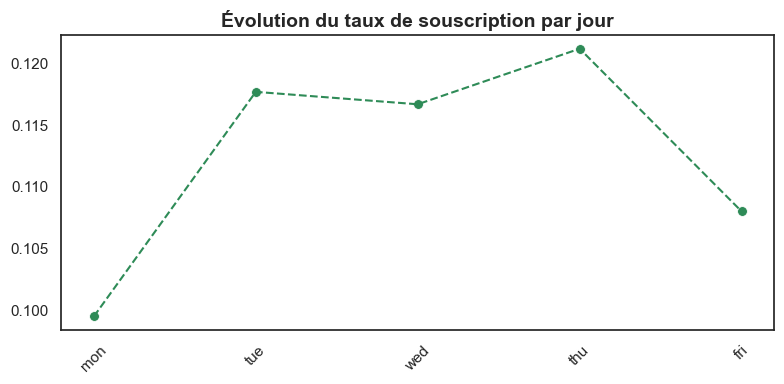

In [19]:
# Création du scatterplot
fig, ax = plt.subplots(figsize=(8, 4))
plot_scatterplot(ax, day_data, 'day_of_week', 'subscription_rate', "Évolution du taux de souscription par jour")
plt.tight_layout()
plt.show()

**Observation**

* **Jour le plus performant** : le jeudi avec 12,1%, suivi de près par mardi et mercredi (~11,7–11,8%).
* **Jour le moins performant** : le lundi avec 9,9%, possiblement dû à un retard de réactivité des clients après le week-end ou à un flux de travail plus chargé.
* **Vendredi** : légère baisse (10,8%), souvent liée à la préparation du week-end, les clients étant moins disponibles ou concentrés sur leurs finances.

**Interprétation**

* Les milieux de semaine (mardi à jeudi) sont les moments les plus propices pour la souscription : les clients sont disponibles, réactifs et concentrés sur leurs décisions financières.
* Les extrémités de semaine (lundi et vendredi) sont moins efficaces pour la prospection, nécessitant un message plus ciblé ou un suivi différé.

**Recommandation**

1. **Planifier les campagnes principales** de souscription pour mardi à jeudi pour maximiser le taux de conversion.
2. **Adapter le message du lundi et vendredi**, par exemple via emails ou notifications légères plutôt que des appels directs.
3. **Combiner l’analyse par jour avec celle par mois** pour identifier les périodes les plus efficaces (ex. jeudi de mars ou de décembre).

#### duration

La durée d’appel (exprimée en secondes, valeurs comprises entre 0 et 300 dans notre jeu de données) a été transformée en classes afin de mieux analyser son impact sur la probabilité de souscription à un dépôt à terme.

**Objectif**

* Faciliter l'interprétation de l'effet des appels sur le comportement client.
* Identifier les plages de durée les plus propices à la conversion.

**Classes retenues**

* **0-30 sec** : durée très courte, appel interrompu rapidement, refus immédiat ou indisponibilité du client.
* **31-120 sec** : durée courte, échange bref, présentation sommaire, probabilité de conversion faible.
* **121-240 sec** : durée moyenne, discussion construite, temps suffisant pour présenter l'offre, probabilité accrue de conversion.
* **241+ sec** : durée longue, interaction approfondie, client hésitant, ou intéressé, forte probabilité de souscription.

Ces seuils correspondent aux pratiques observées dans les campagnes de prospection bancaire, où la durée de l'appel reflète souvent le niveau d'engagement du prospect.

In [20]:
# Définition des bornes et labels
bins = [-0.1, 30, 120, 240, np.inf]
labels = ["0-30", "31-120", "121-240", "241+"]

# Création de la colonne 'duration_group'
eda_data['duration_group'] = pd.cut(eda_data['duration'], bins=bins, labels=labels, right=True)

eda_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,missing_education,missing_default,missing_housing,missing_loan,outlier_duration,outlier_campaign,outlier_previous,never_contacted,age_group,duration_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,False,True,50-59,241+
1,57,services,married,high.school,missing,no,no,telephone,may,mon,...,False,True,False,False,False,False,False,True,50-59,121-240
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,False,False,False,False,False,False,False,True,30-39,121-240
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,False,True,40-49,121-240
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,False,False,False,False,True,False,False,True,50-59,241+


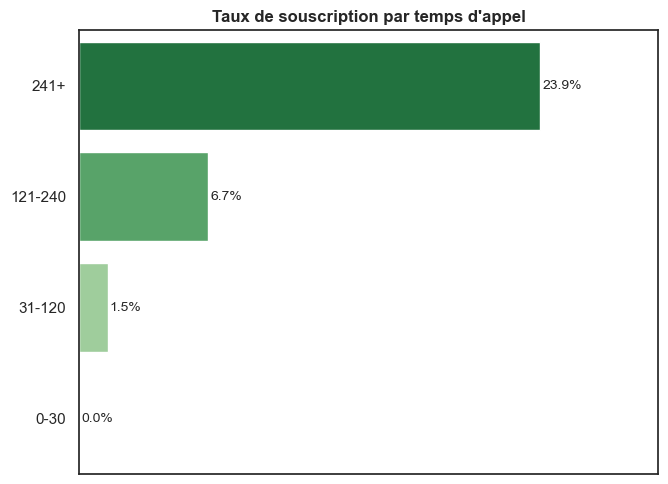

In [21]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'duration_group', "Taux de souscription par temps d'appel")

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.xlim(0,0.3)           # limites de l'axe X de 0 à 0.5 (0% à 30%)

# Affichage du graphique
plt.show()

**Observation**

* **Absence toale d'efficacité pour les appels très courts (≤30 sec)** : cela reflète des appels interrompus trop tôt, souvent perçus comme une tentative de prospection « froide » ou un manque de disponibilité du client.
* **Faible efficacité des appels courts (31–120 sec, 1,5%)** : les appels de moins de 2 minutes ne permettent généralement pas de présenter l’offre de manière convaincante ni de répondre aux objections.
* **Amélioration progressive pour les appels moyens (121–240 sec, 6,7%)** : entre 2 et 4 minutes, l’agent parvient à exposer les points clés et à capter un minimum d’attention, mais la conversion reste encore limitée.
* **Taux de souscription élevé pour les appels longs (241+ sec, 23,9%)** : plus de 4 minutes semble être le seuil critique de persuasion : le client a le temps d’écouter, poser des questions, et l’agent peut personnaliser son discours.

**Interprétation**

* La durée d’appel est directement corrélée au taux de conversion : plus l’agent garde le client en ligne, plus la probabilité de souscription augmente.
* Cela suggère que la qualité de l’interaction et la capacité à retenir l’attention sont des facteurs déterminants.
* Les appels très courts (0–30 sec) sont souvent liés à des rejets immédiats ou indisponibilités → il est essentiel de filtrer ou reprogrammer ces appels.

**Recommandation**

1. **Former les conseillers à maintenir l’attention au-delà de 4 minutes**, avec un script engageant dès les premières secondes.
2. **Analyser les scripts d’appel** : pourquoi certains échouent à dépasser 2 minutes → améliorer l’accroche initiale.
3. **Segmenter les clients** : réserver les appels longs aux profils à fort potentiel, et utiliser d’autres canaux (SMS, email) pour les prospects moins engagés.
4. **Mettre en place un indicateur interne** (ex. “durée moyenne d’appel avant souscription”) pour suivre la performance des équipes.
5. **Exclure cette variable du modèle** : cette variable encode une information quasi-parfaite sur la souscription. La variable pourrait **gonfler artificiellement la performance prédictive**, car le modèle bénéficierait d’une information directement dérivée de la cible. De plus, la durée d'appel n'est pas connue avant la prédiction. L'inclure dans le modèle entraînerait un **target leakage**.

#### campaign

La variable `campaign` indique le nombre de contacts téléphoniques réalisés auprès d’un même client lors de la campagne de prospection. Dans le jeu de données nettoyé, les valeurs observées s'étendent de 1 à 5.

Afin d'évaluer l'impact du nombre d'appels sur la probabilité de souscription, cette variable a été regroupée en trois classes : 
* **Faible (1 appel)** : client réactif, ayant donné une réponse (positive ou négative) dès le premier appel.
* **Moyen (2-3 appels)** : client nécessitant une ou deux relances, profil hésitant ou peu disponible mais potentiellement intéressé.
* **Élevé (≥4 appels)** : client ayant fait l'objet de multiples relances, généralement plus difficile à convaincre et moins réceptif à l'offre.

Cette catégorisation simplifie la lecture des résultats et évite une granularité trop fine qui rendrait l'interprétation moins intuitive.

In [22]:
# Définition des bornes et labels
bins = [0, 1, 3, np.inf]
labels = ["1", "2-3", "4+"]

# Création de la colonne 'campaign_group'
eda_data['campaign_group'] = pd.cut(eda_data['campaign'], bins=bins, labels=labels, right=True)

eda_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,missing_default,missing_housing,missing_loan,outlier_duration,outlier_campaign,outlier_previous,never_contacted,age_group,duration_group,campaign_group
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,True,50-59,241+,1
1,57,services,married,high.school,missing,no,no,telephone,may,mon,...,True,False,False,False,False,False,True,50-59,121-240,1
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,False,False,False,False,False,False,True,30-39,121-240,1
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,False,False,False,False,False,False,True,40-49,121-240,1
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,False,False,False,True,False,False,True,50-59,241+,1


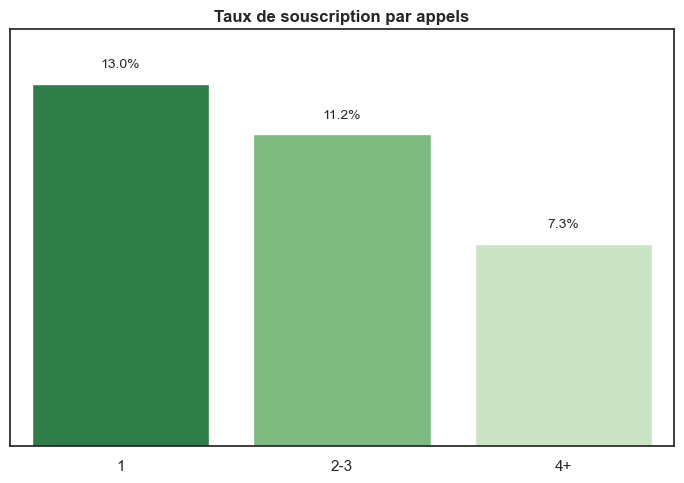

In [23]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'campaign_group', "Taux de souscription par appels", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.15)           # limites de l'axe Y de 0 à 0.5 (0% à 15%)

# Affichage du graphique
plt.show()

**Observation**

* **Taux le plus élevé pour le premier appel (13%)** : la plupart des clients décident de souscrire dès le premier contact, ce qui suggère que le message initial et l’accroche de l’agent sont cruciaux.
* **Diminution progressive avec les appels suivants (2-3 : 11,2% et 4+ : 7,3%)** : les clients nécessitant plusieurs relances sont moins réceptifs, ce qui peut indiquer une moindre motivation ou un intérêt limité pour le produit.

**Interprétation**

* Un premier appel bien ciblé maximise le taux de conversion.
* Chaque appel supplémentaire diminue la probabilité de souscription, révélant un effet de saturation ou de rejet.
* Les clients qui répondent dès le premier appel pourraient représenter un segment premium à fort potentiel.

**Recommandation marketing**

1. **Optimiser le premier appel** avec un script clair, personnalisé et engageant.
2. **Limiter le nombre de relances** : plus de 3 appels semble inefficace pour ce type de produit.
3. **Prioriser les prospects à fort potentiel** pour le premier contact, plutôt que de consacrer beaucoup de ressources aux clients peu réceptifs.
4. **Analyser le timing et le canal de contact** pour maximiser la réussite dès le premier appel (ex. mobile vs fixe, jour de la semaine, durée de l’appel).

#### poutcome

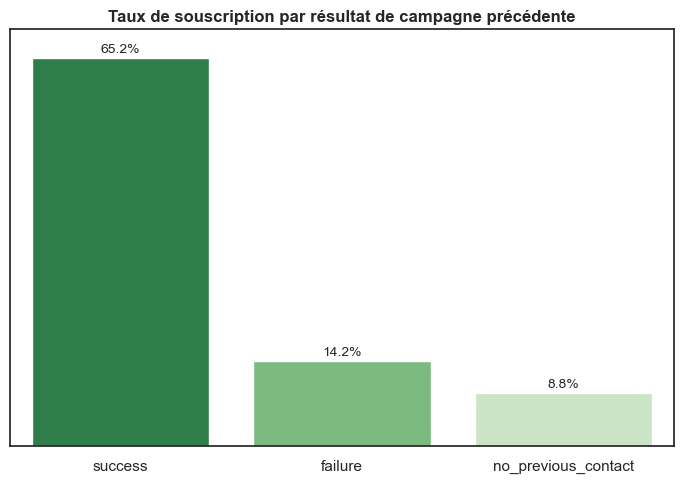

In [24]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'poutcome', "Taux de souscription par résultat de campagne précédente", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.7)           # limites de l'axe Y de 0 à 0.5 (0% à 70%)

# Affichage du graphique
plt.show()

**Observation**

* Le succès lors d'une campagne précédente enregistre un taux très élevé (**65,2%**). Les clients ayant répondu positivement à une précédente campagne sont très susceptibles de souscrire à nouveau, ce qui illustre l’importance de l’historique comportemental.
* Un échec précédent entraîne un taux modéré (**14,2%**). Les clients qui n’avaient pas souscrit lors de la campagne précédente restent quelque peu réceptifs, mais beaucoup moins que les clients « success ».
* Les clients sans historique de contact enregistrent un taux faible (**8,8%**). Ils nécessitent une introduction et un engagement progressif avant de souscrire.

**Interprétation**

* Historique positif = levier clé : les campagnes précédentes créent un effet de familiarité et renforcent la confiance.
* Historique négatif = potentiel limité : ces clients nécessitent une approche différente ou personnalisée.
* Pas de contact = cible prioritaire pour l’acquisition : cette catégorie montre que la souscription dépend fortement de l’exposition préalable à l’offre.

**Recommandation**

1. Segmenter les campagnes selon l'historique :
    * **Success** → campagnes directes et ciblées pour maximiser la conversion.
    * **Failure** → relances avec offres personnalisées ou incentives.
    * **No_previous_contact** → campagnes éducatives ou de sensibilisation pour initier le lien.
2. Prioriser les budgets marketing vers les segments à fort potentiel (success) pour un ROI optimal.
3. Analyser les raisons des échecs précédents pour améliorer le script ou le message, afin d’augmenter le taux de conversion du segment failure.

#### never_contacted

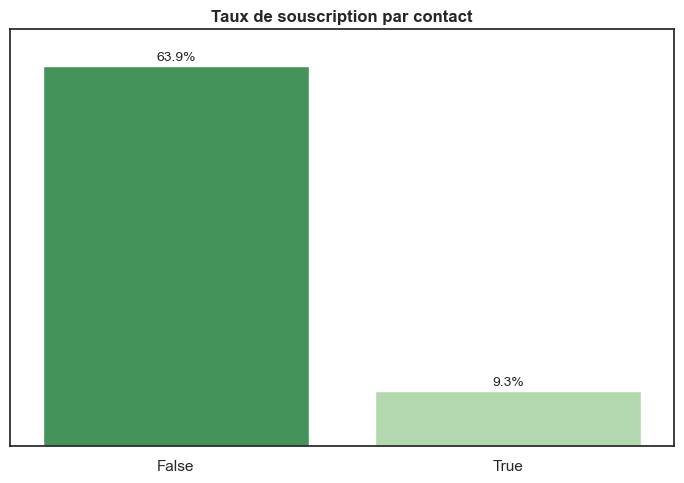

In [25]:
# Configuration du style sans grille
sns.set_theme(style='white')  # Style clair sans grilles

# Création de la Figure et des axes
fig, ax = plt.subplots(figsize=(7, 5))

# Construction du diagramme à barres
plot_subscription_rate(ax, eda_data, 'never_contacted', "Taux de souscription par contact", orientation='vertical')

# Ajustements
plt.tight_layout()        # ajustement automatique des marges 
plt.ylim(0,0.7)           # limites de l'axe Y de 0 à 0.5 (0% à 70%)

# Affichage du graphique
plt.show()

**Observation**

* Les clients ayant déjà été approchés par la banque montrent un taux de souscription beaucoup plus élevé (**63,9%**), ce qui souligne l'importance d'une relation préalable et de la familiarité avec l'institution.
* L'absence de contact initial entraîne un taux de conversion très faible, indiquant que ces clients ont besoin d'un accompagnement ou d'une introduction avant d'accepter un produit.

**Interprétation**

* Les clients déjà exposés aux produits bancaires ont plus de confiance et comprennent mieux l'offre.
* Les clients jamais contactés nécessitent des efforts de sensibilisation et des messages adaptés, tandis que les clients déjà contactés sont les plus faciles à convertir.

**Recommandation**

1. Prioriser les clients déjà contactés dans les campagnes de souscription pour maximiser le ROI.
2. Mettre en place des campagnes de sensibilisation pour les clients jamais contactés afin de créer un premier lien avant de proposer un produit.
3. Utiliser des canaux multiples (email, SMS, appels) pour initier le premier contact avec les clients non approchés.
4. Suivre les performances de chaque segment afin d’ajuster la stratégie marketing selon la réactivité et l’historique de contact.

### 📈 Variables économiques

#### emp.var.rate